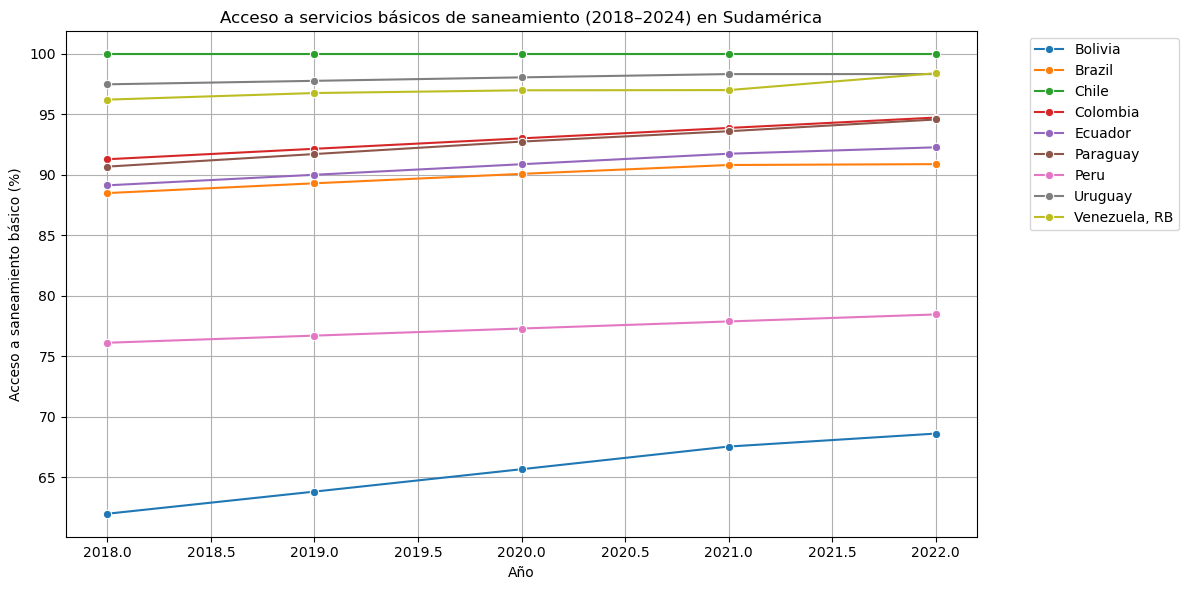

            País  Acceso a saneamiento básico (%)
2          Chile                       100.000000
7        Uruguay                        97.990680
8  Venezuela, RB                        97.071627
3       Colombia                        93.011054
5       Paraguay                        92.662967
4        Ecuador                        90.804640
1         Brazil                        89.912460
6           Peru                        77.292875
0        Bolivia                        65.524722


In [1]:
# --- ANÁLISIS DE SERVICIOS BÁSICOS DE SANEAMIENTO EN SUDAMÉRICA ---

import requests
import pandas as pd

# Configurar pandas para mostrar todas las filas sin truncar
pd.set_option("display.max_rows", None)

# 1. Definir la URL base y parámetros para la consulta a la API del Banco Mundial
url_base = "https://api.worldbank.org/v2/country/all/indicator/SH.STA.BASS.ZS"
params = {
    "format": "json",
    "per_page": 1000,
    "page": 1
}

# Lista vacía para almacenar todos los datos recolectados de la API
todos_los_datos = []

# 2. Realizar una primera consulta para saber cuántas páginas existen
respuesta = requests.get(url_base, params=params)
data = respuesta.json()
paginas_totales = data[0]['pages']

# 3. Recorrer todas las páginas de la API y extraer los registros válidos
for pagina in range(1, paginas_totales + 1):
    params["page"] = pagina
    respuesta = requests.get(url_base, params=params)
    data = respuesta.json()
    registros = data[1]
    for r in registros:
        if r["value"] is not None:
            todos_los_datos.append({
                "País": r["country"]["value"],
                "Año": int(r["date"]),
                "Acceso a saneamiento básico (%)": float(r["value"])
            })

# 4. Crear un DataFrame con todos los datos recolectados
df = pd.DataFrame(todos_los_datos)

# 5. Definir los países sudamericanos que se desean analizar
paises_sudamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Paraguay", "Peru", "Uruguay", "Venezuela, RB"
]

# 6. Filtrar el DataFrame para quedarnos solo con:
#    - Países sudamericanos
#    - Años entre 2018 y 2024
df_filtrado = df[
    (df["País"].isin(paises_sudamericanos)) &
    (df["Año"].between(2018, 2024))
]

# 7. Ordenar los datos por país y por año (ascendente)
df_filtrado = df_filtrado.sort_values(by=["País", "Año"], ascending=[True, True])

# Mostrar el DataFrame final filtrado
df_filtrado

# Guardar la base de datos en Excel
df_filtrado.to_excel("Servicios_Basicos_Saneamiento.xlsx", index=False)

# Visualización: Línea de tiempo del acceso a saneamiento básico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_filtrado,
    x="Año",
    y="Acceso a saneamiento básico (%)",
    hue="País",
    marker="o"
)
plt.title("Acceso a servicios básicos de saneamiento (2018–2024) en Sudamérica")
plt.ylabel("Acceso a saneamiento básico (%)")
plt.xlabel("Año")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualización interactiva con Plotly
import plotly.express as px

fig = px.line(
    df_filtrado,
    x="Año",
    y="Acceso a saneamiento básico (%)",
    color="País",
    markers=True,
    title="Acceso a servicios básicos de saneamiento (2018–2024) en Sudamérica"
)
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Acceso a saneamiento básico (%)",
    hovermode="closest"
)
fig.show()

# Análisis descriptivo: Promedio de acceso por país
promedios = df_filtrado.groupby("País")["Acceso a saneamiento básico (%)"].mean().reset_index()
promedios = promedios.sort_values(by="Acceso a saneamiento básico (%)", ascending=False)
print(promedios)

# Gráfico de barras horizontal del promedio
fig = px.bar(
    promedios,
    x="Acceso a saneamiento básico (%)",
    y="País",
    orientation='h',
    color="País",
    title="Promedio de Acceso a Saneamiento Básico (2018–2024) en Sudamérica"
)
fig.update_layout(
    xaxis_title="Acceso a saneamiento básico (%)",
    yaxis_title="País",
    yaxis={'categoryorder':'total ascending'}
)
fig.show()